In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore

In [2]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/census_income.csv')
print(df.shape)
print(df.dtypes)

(32560, 15)
Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object


In [3]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
for i in df:
    un=df[i].unique().size
    print(i,un)

Age 73
Workclass 9
Fnlwgt 21647
Education 16
Education_num 16
Marital_status 7
Occupation 15
Relationship 6
Race 5
Sex 2
Capital_gain 119
Capital_loss 92
Hours_per_week 94
Native_country 42
Income 2


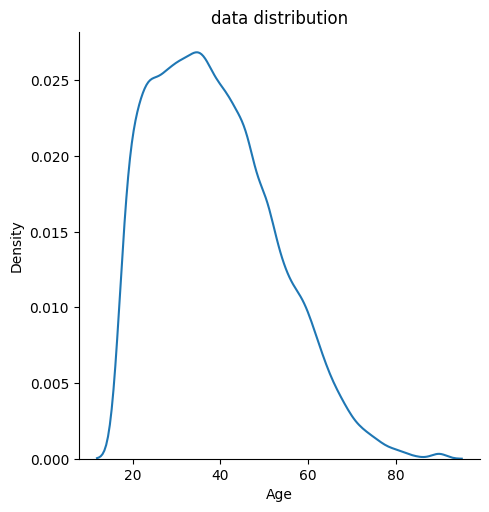

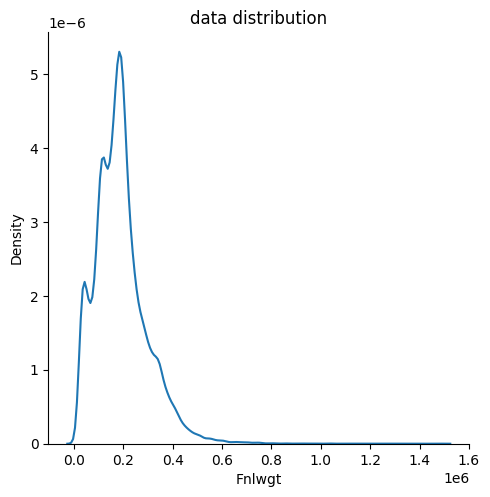

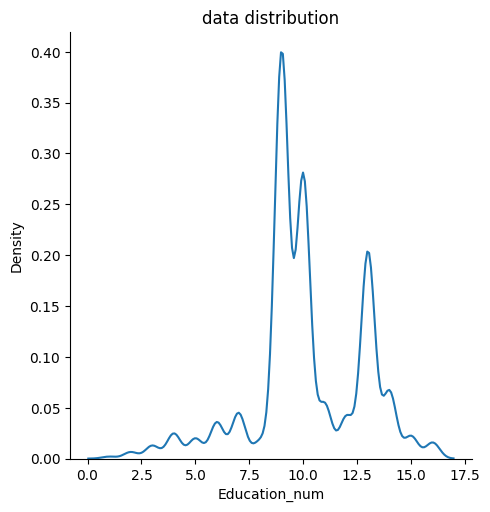

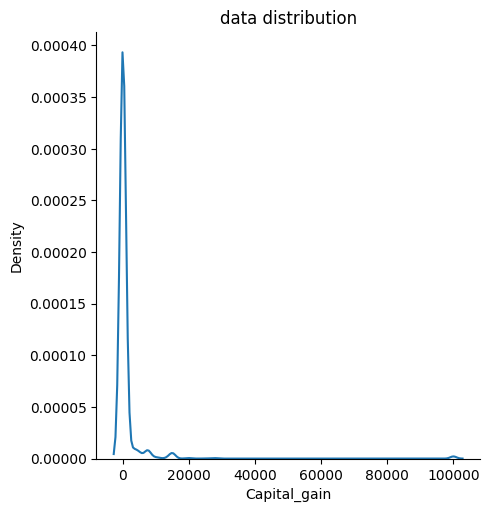

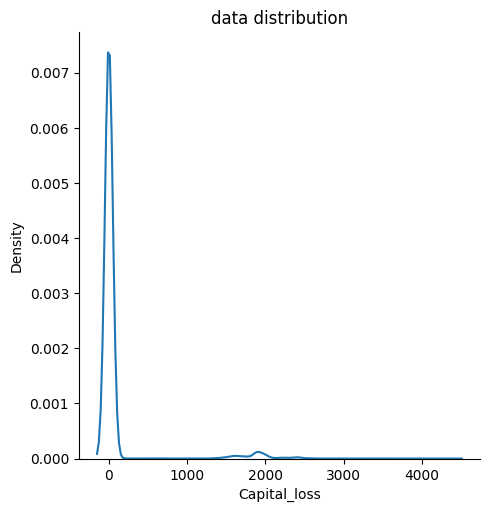

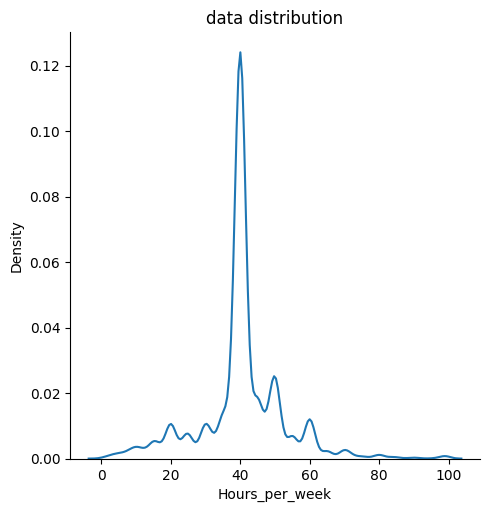

In [6]:
for i in df:
    if df[i].dtype=='int64':
        sns.displot(df,x=i,kind='kde')
        plt.xlabel(i)
        plt.title('data distribution')
        plt.show()
    else: pass 

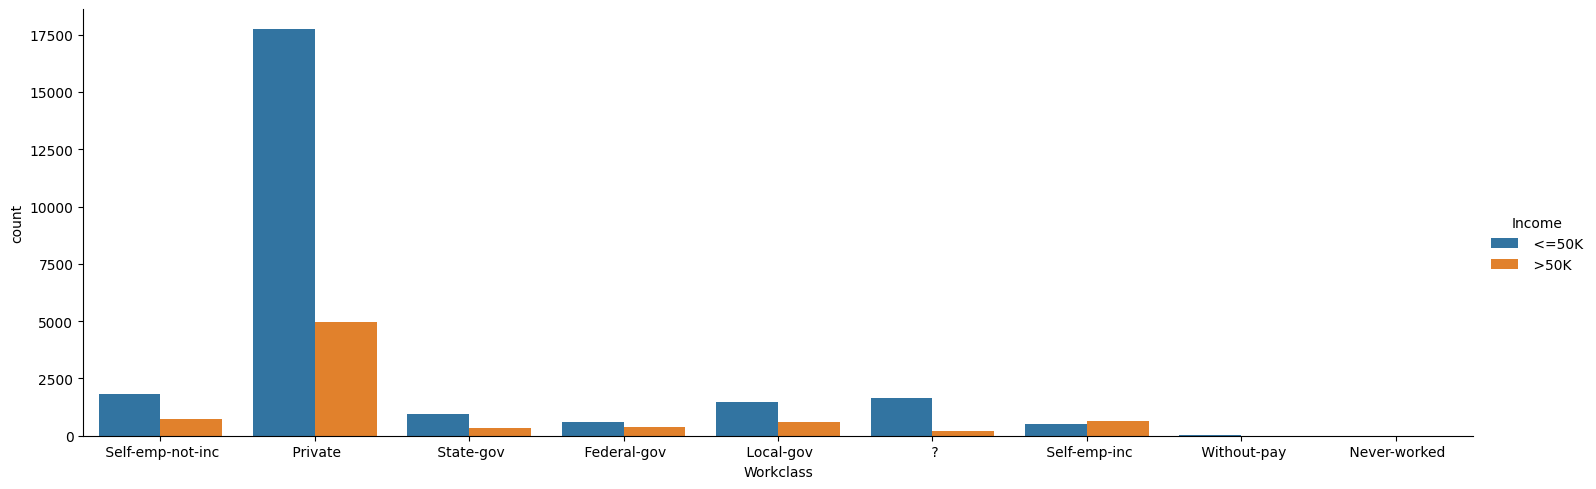

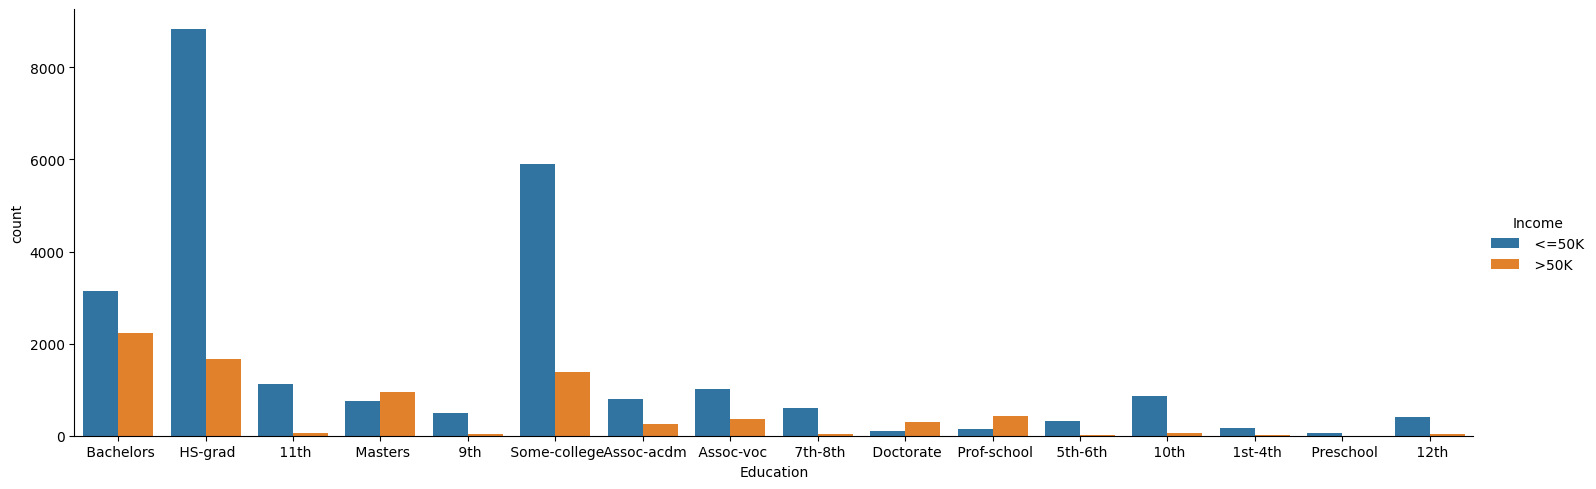

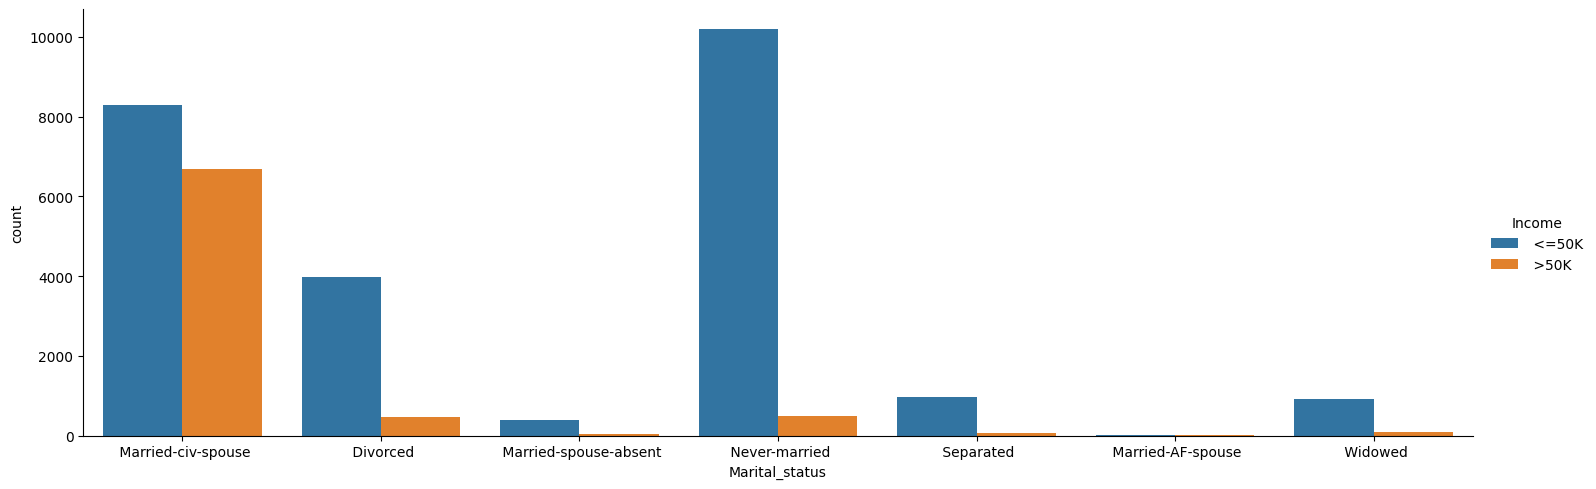

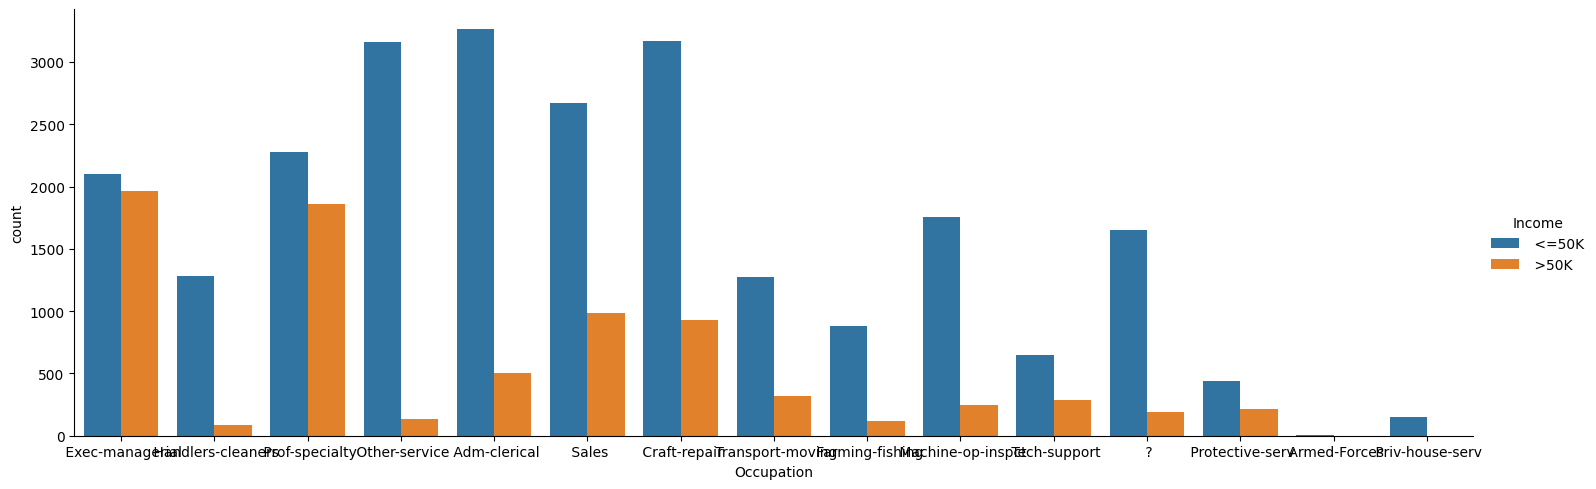

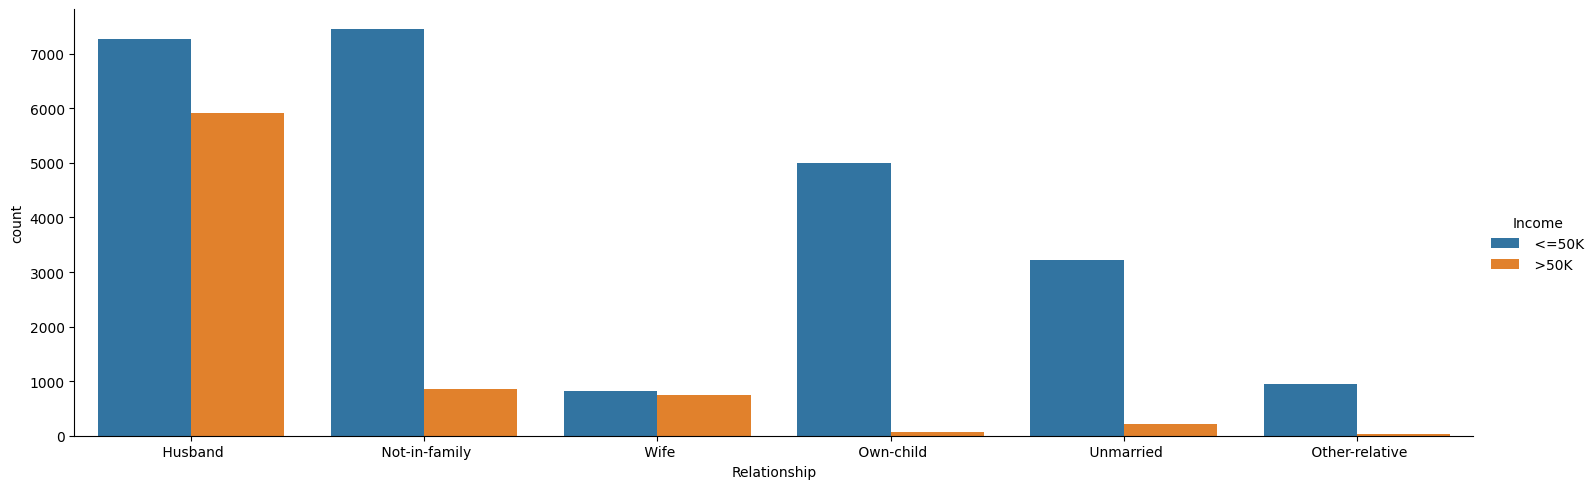

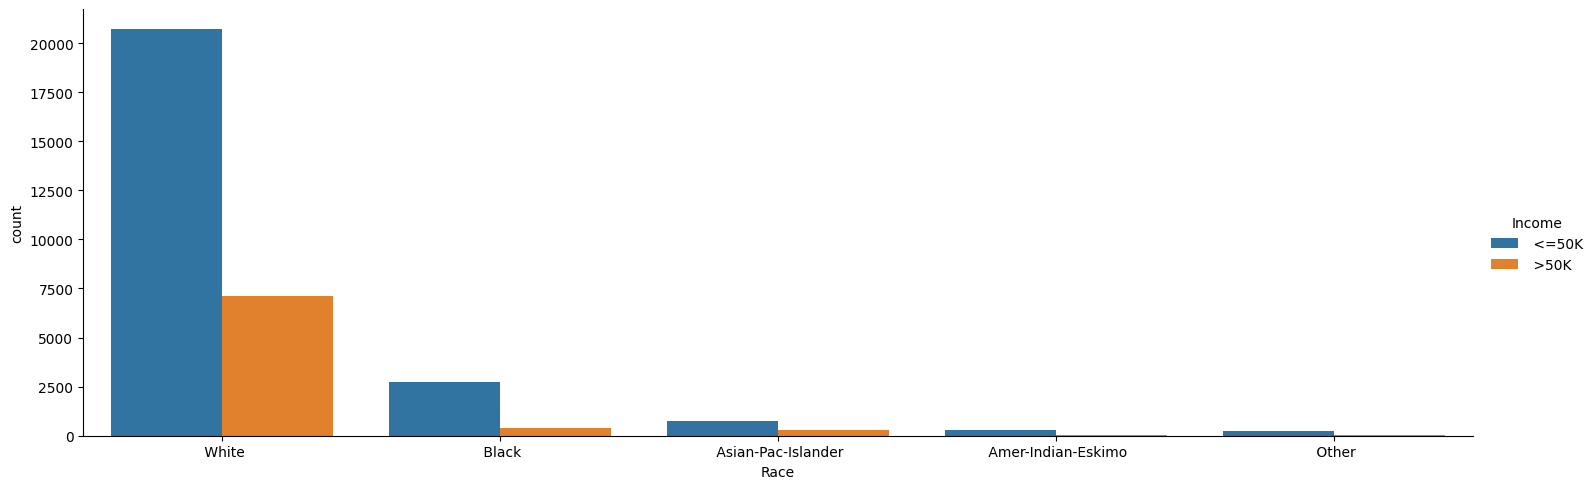

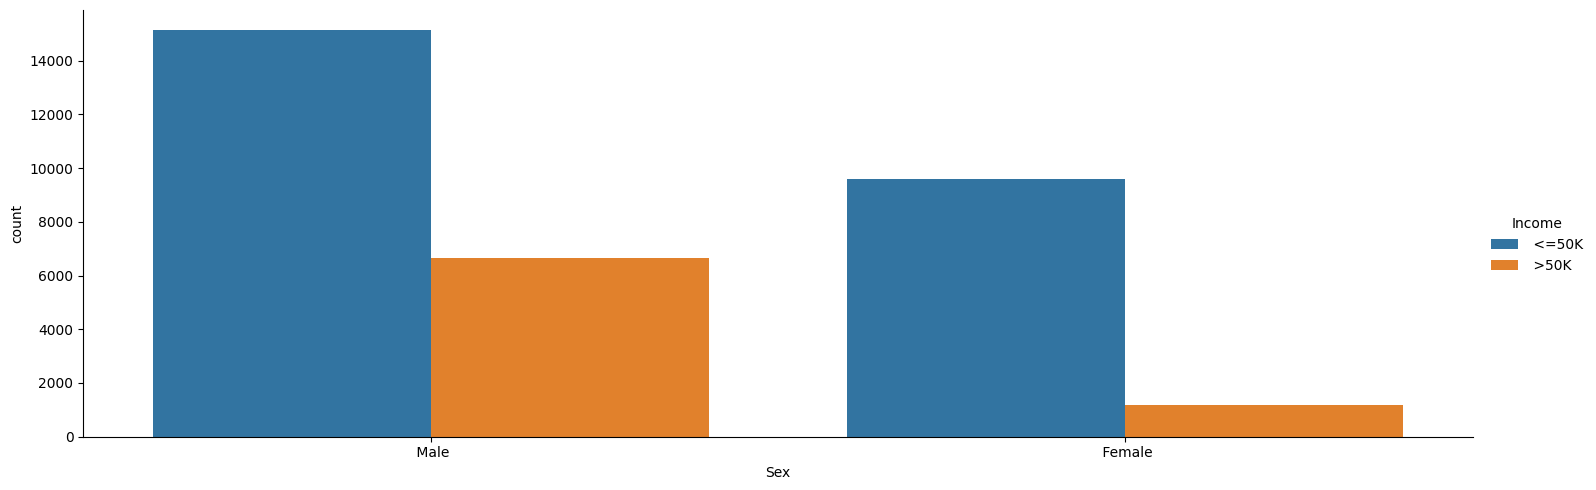

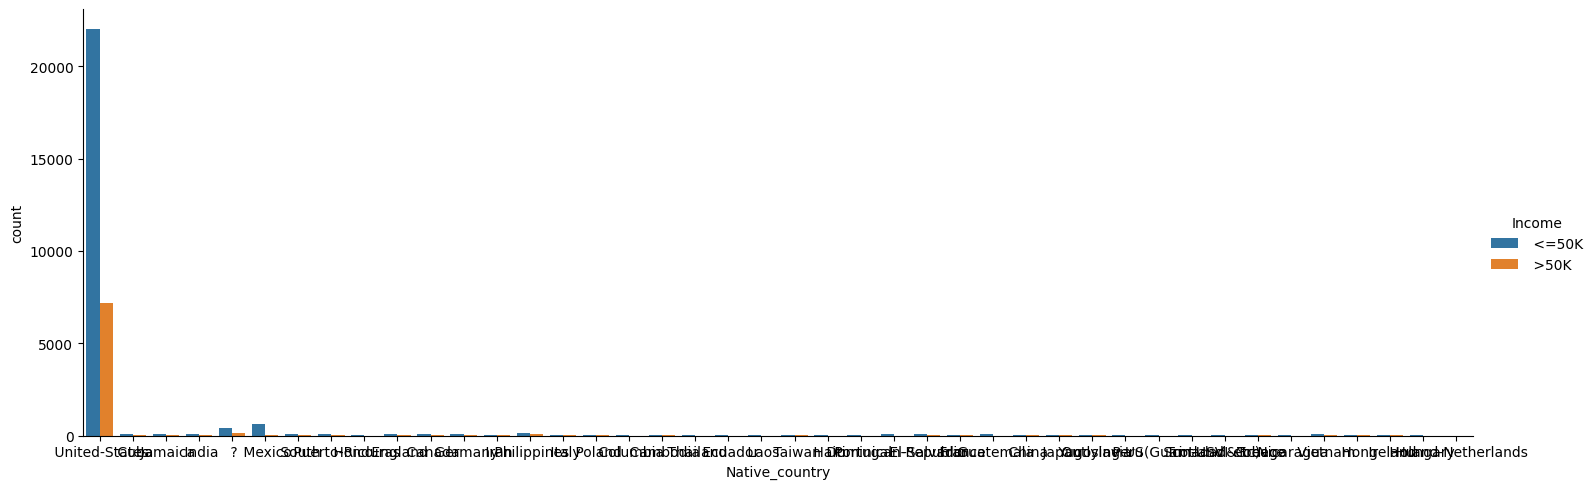

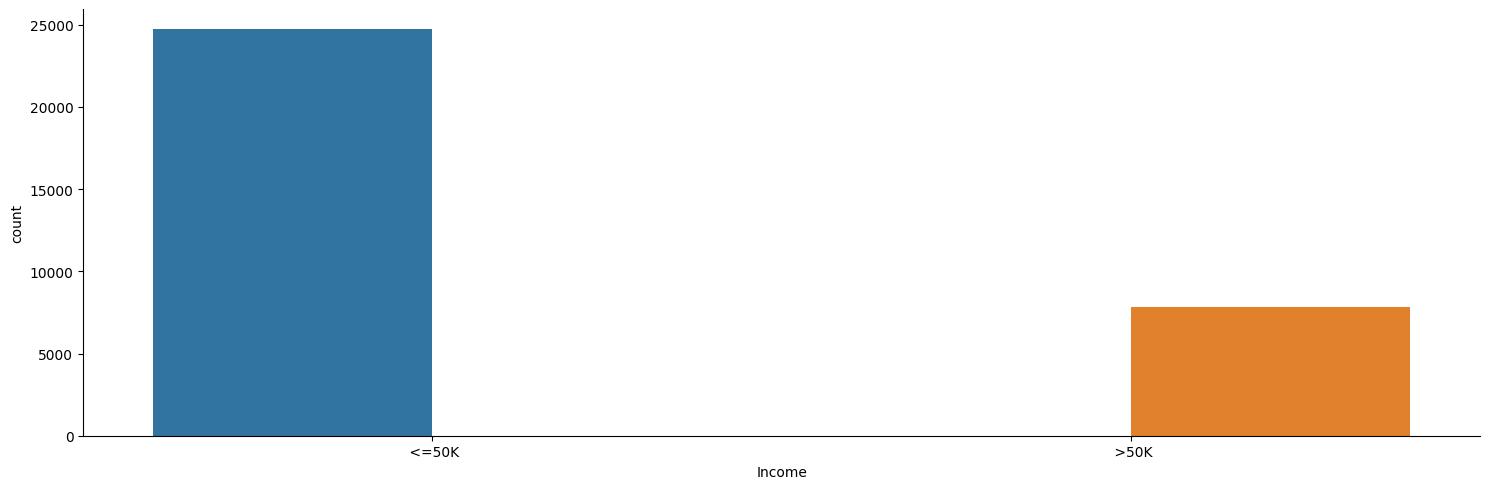

In [7]:
for i in df:
    if df[i].dtype==object:
        sns.catplot(df,x=i,kind='count',hue='Income',height=5,aspect=3)
        plt.xlabel(i)
        plt.show()
    else: pass

<function matplotlib.pyplot.show(close=None, block=None)>

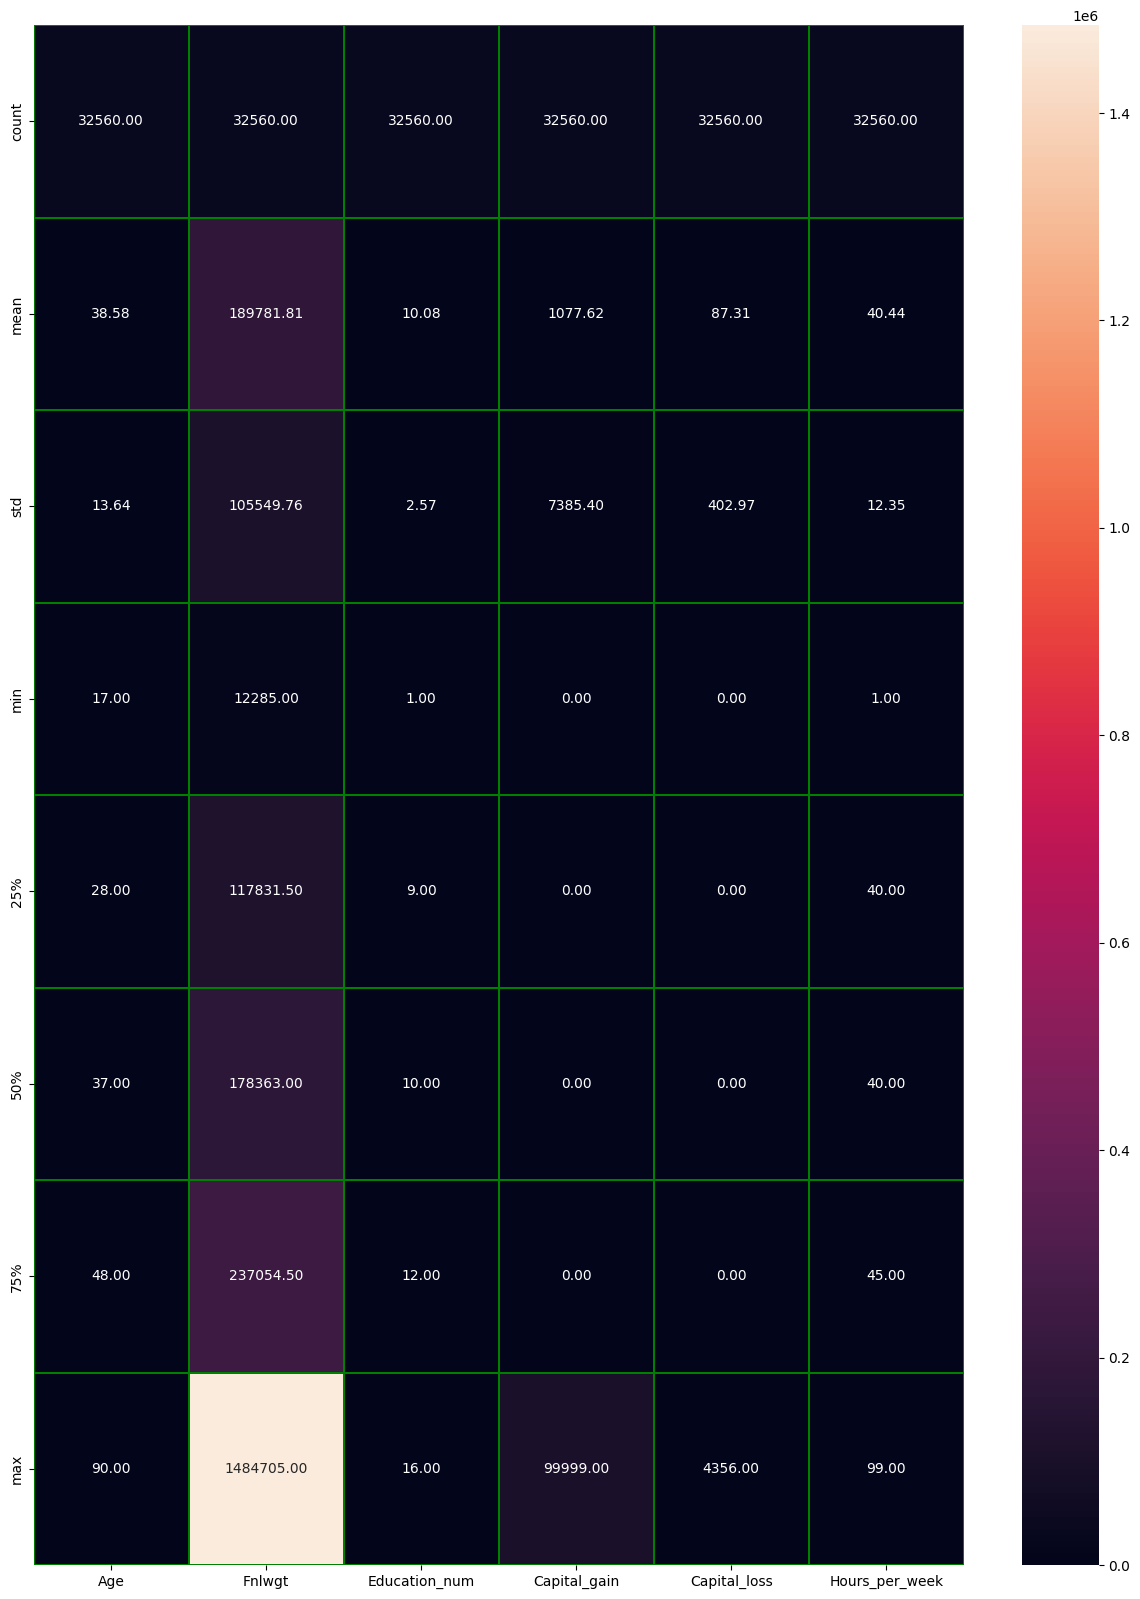

In [8]:
plt.figure(figsize=(15,20))
v=df.describe()
sns.heatmap(v,annot=True,fmt='0.2f',linecolor='green',linewidths=0.2)
plt.show

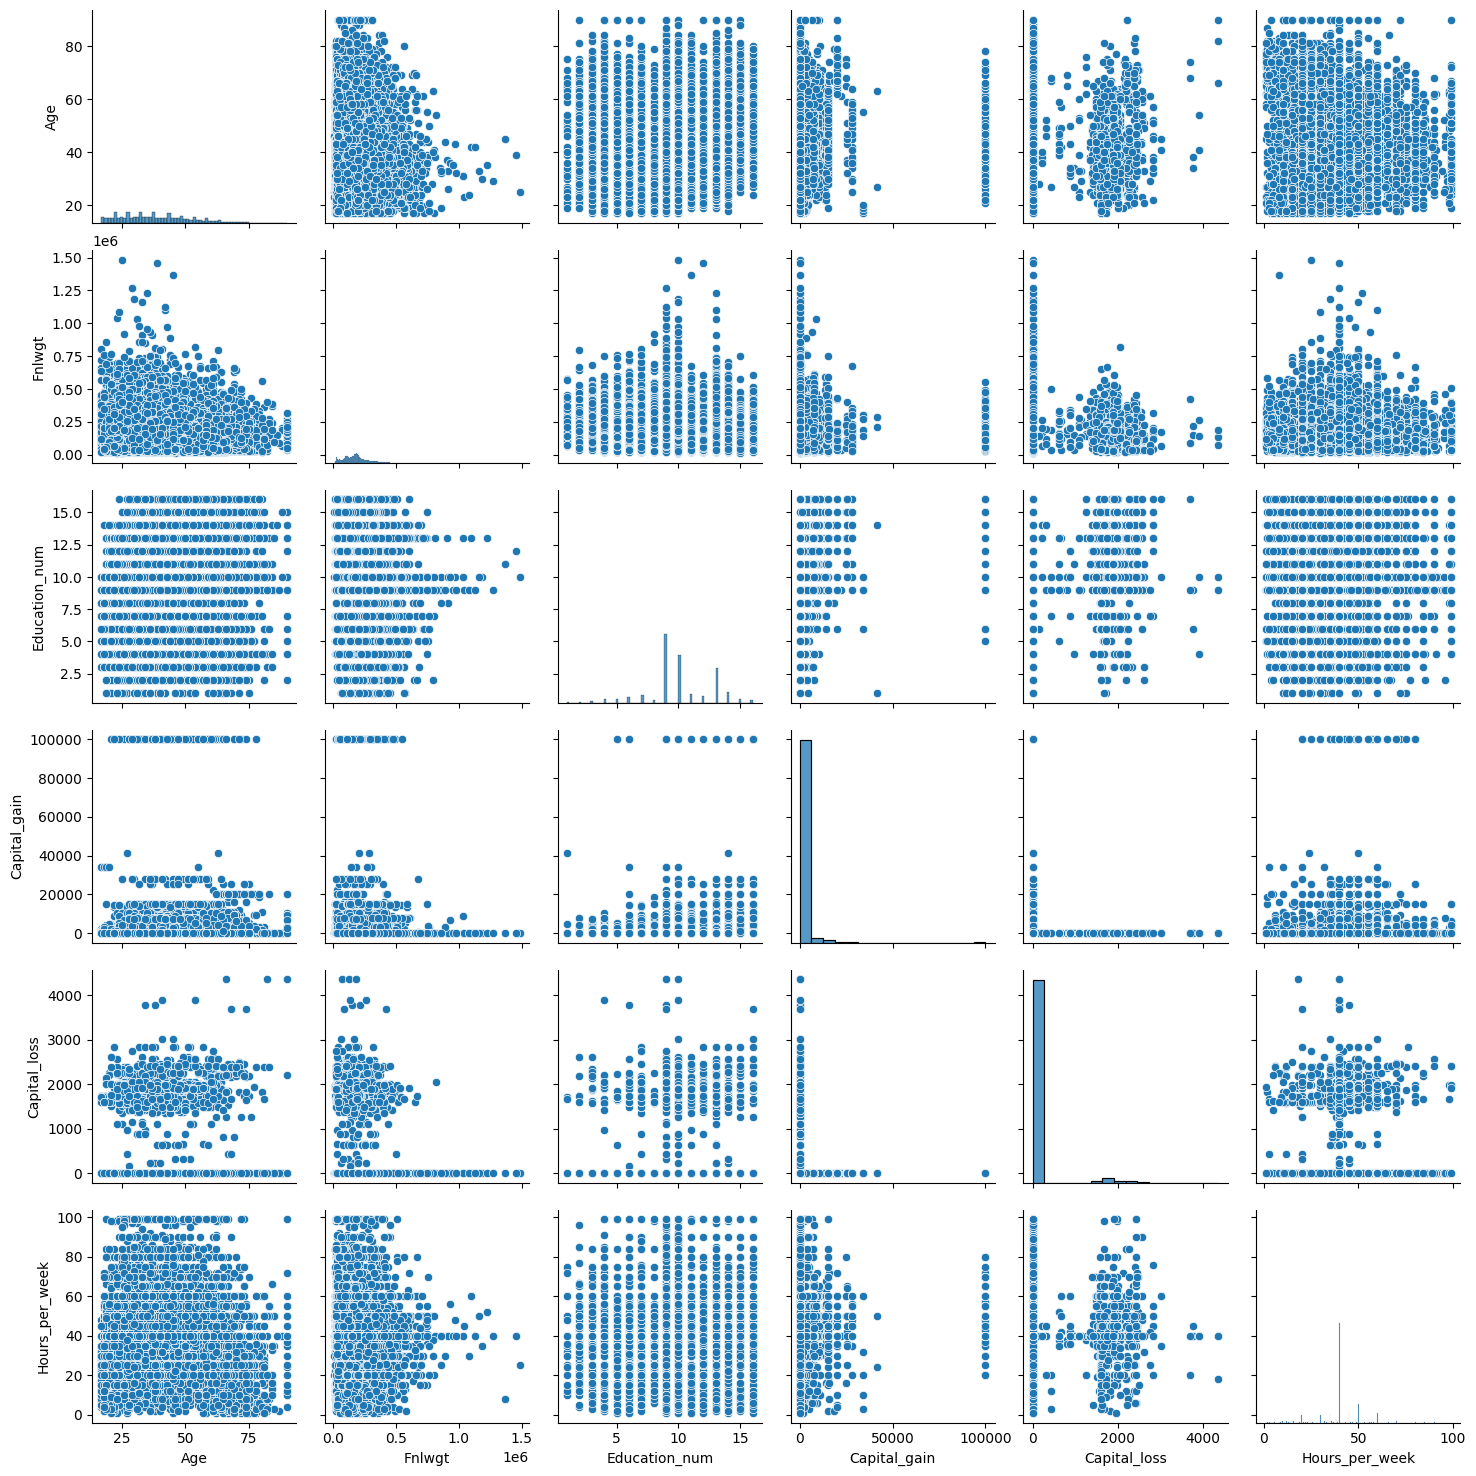

In [9]:
sns.pairplot(df)

In [10]:
oe=OrdinalEncoder()
for column in df:
    if df[column].dtype==object:
        oe=OrdinalEncoder()
        df[column]=oe.fit_transform(df[column].values.reshape(-1,1))
    else:pass 
print(df)

       Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50        6.0   83311        9.0             13             2.0   
1       38        4.0  215646       11.0              9             0.0   
2       53        4.0  234721        1.0              7             2.0   
3       28        4.0  338409        9.0             13             2.0   
4       37        4.0  284582       12.0             14             2.0   
...    ...        ...     ...        ...            ...             ...   
32555   27        4.0  257302        7.0             12             2.0   
32556   40        4.0  154374       11.0              9             2.0   
32557   58        4.0  151910       11.0              9             6.0   
32558   22        4.0  201490       11.0              9             4.0   
32559   52        5.0  287927       11.0              9             2.0   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0             4.0        

In [11]:
## Analysis the skew ness and modification
for i in df:
    x=df[i].skew()
    if x>=5:
        df[i]=np.cbrt(df[i])
    else:pass

print('modified skewness of "df_data" is:')
print('=======================================')
print(df.skew())

modified skewness of "df_data" is:
Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.594549
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64


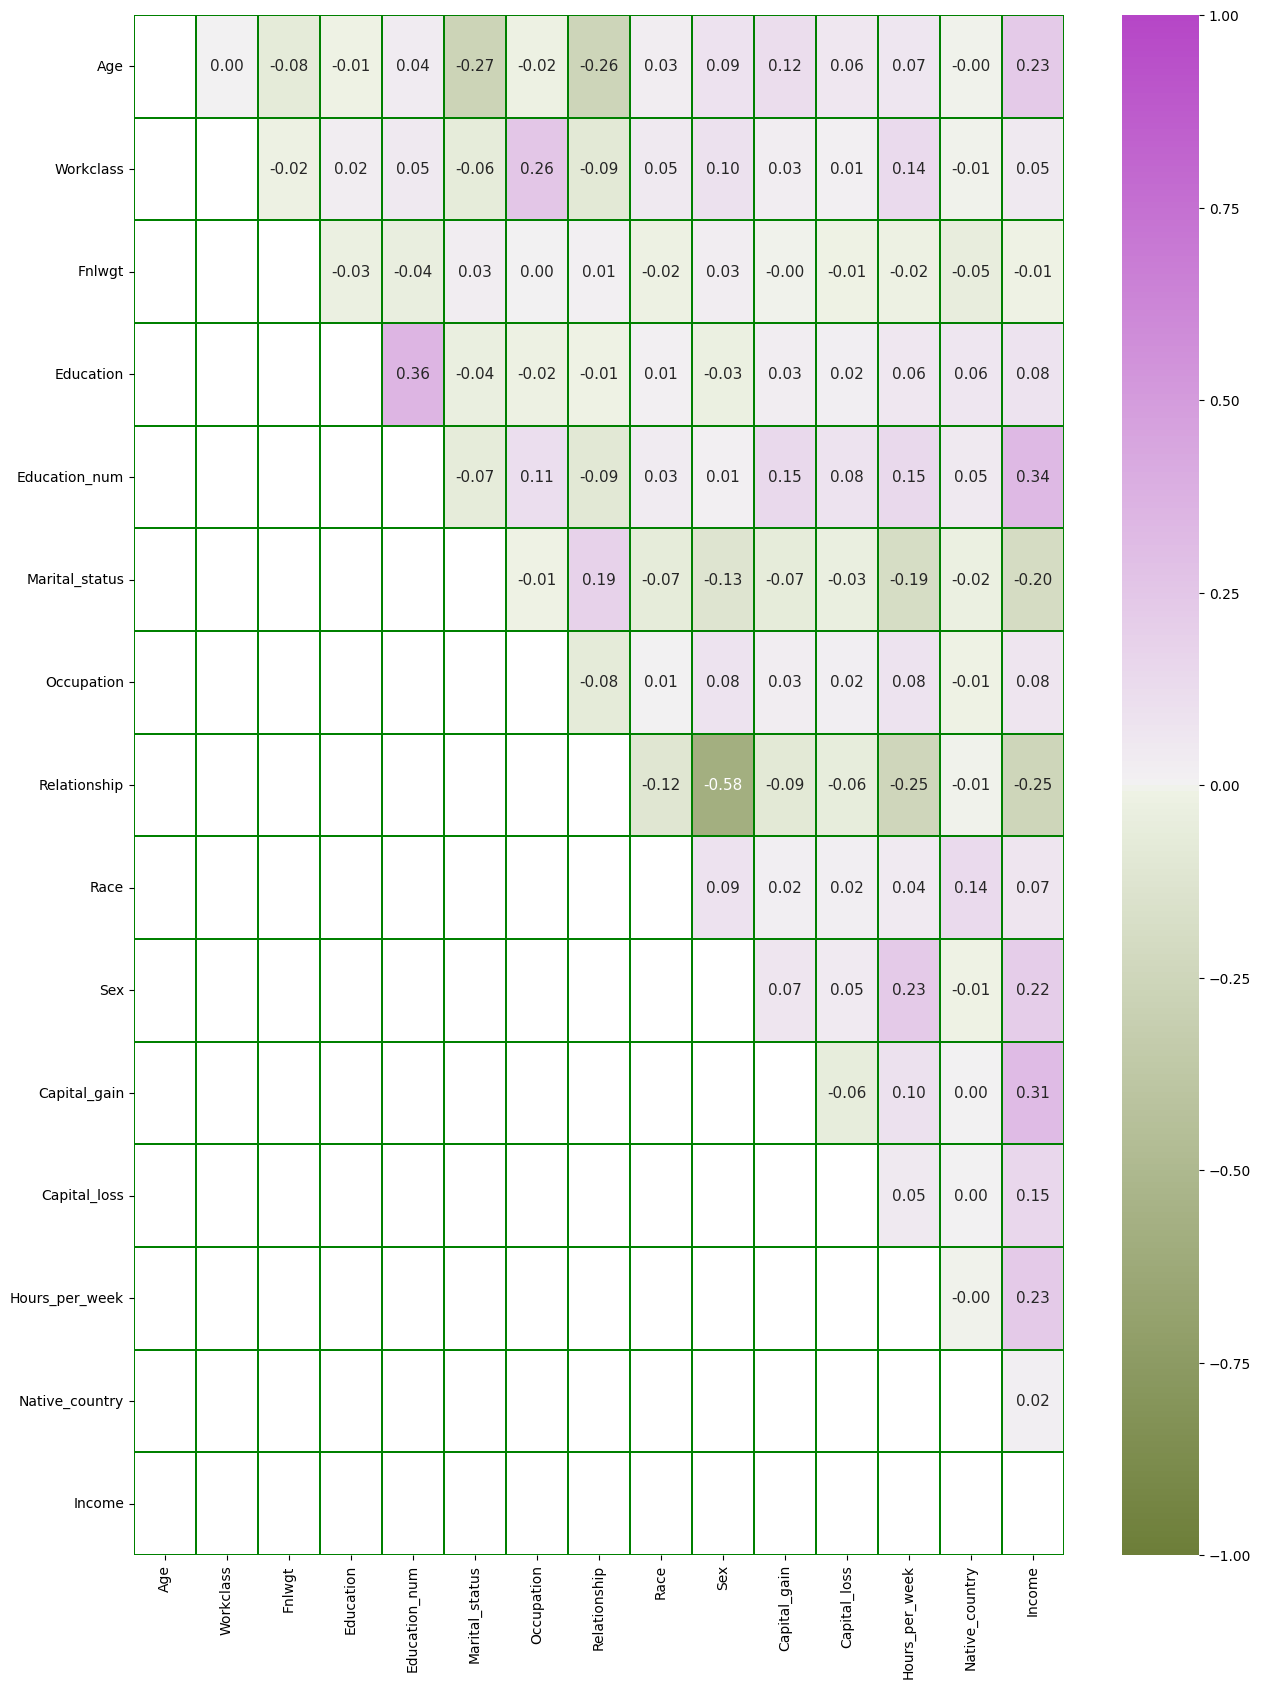

In [12]:
v=df.corr()
plt.figure(figsize=(15,20))
mask=np.zeros_like(v)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(v,vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':11},fmt='0.2f',linewidths=0.2,linecolor='green',mask=mask,cmap=sns.diverging_palette(100,300,as_cmap=True))
plt.show()

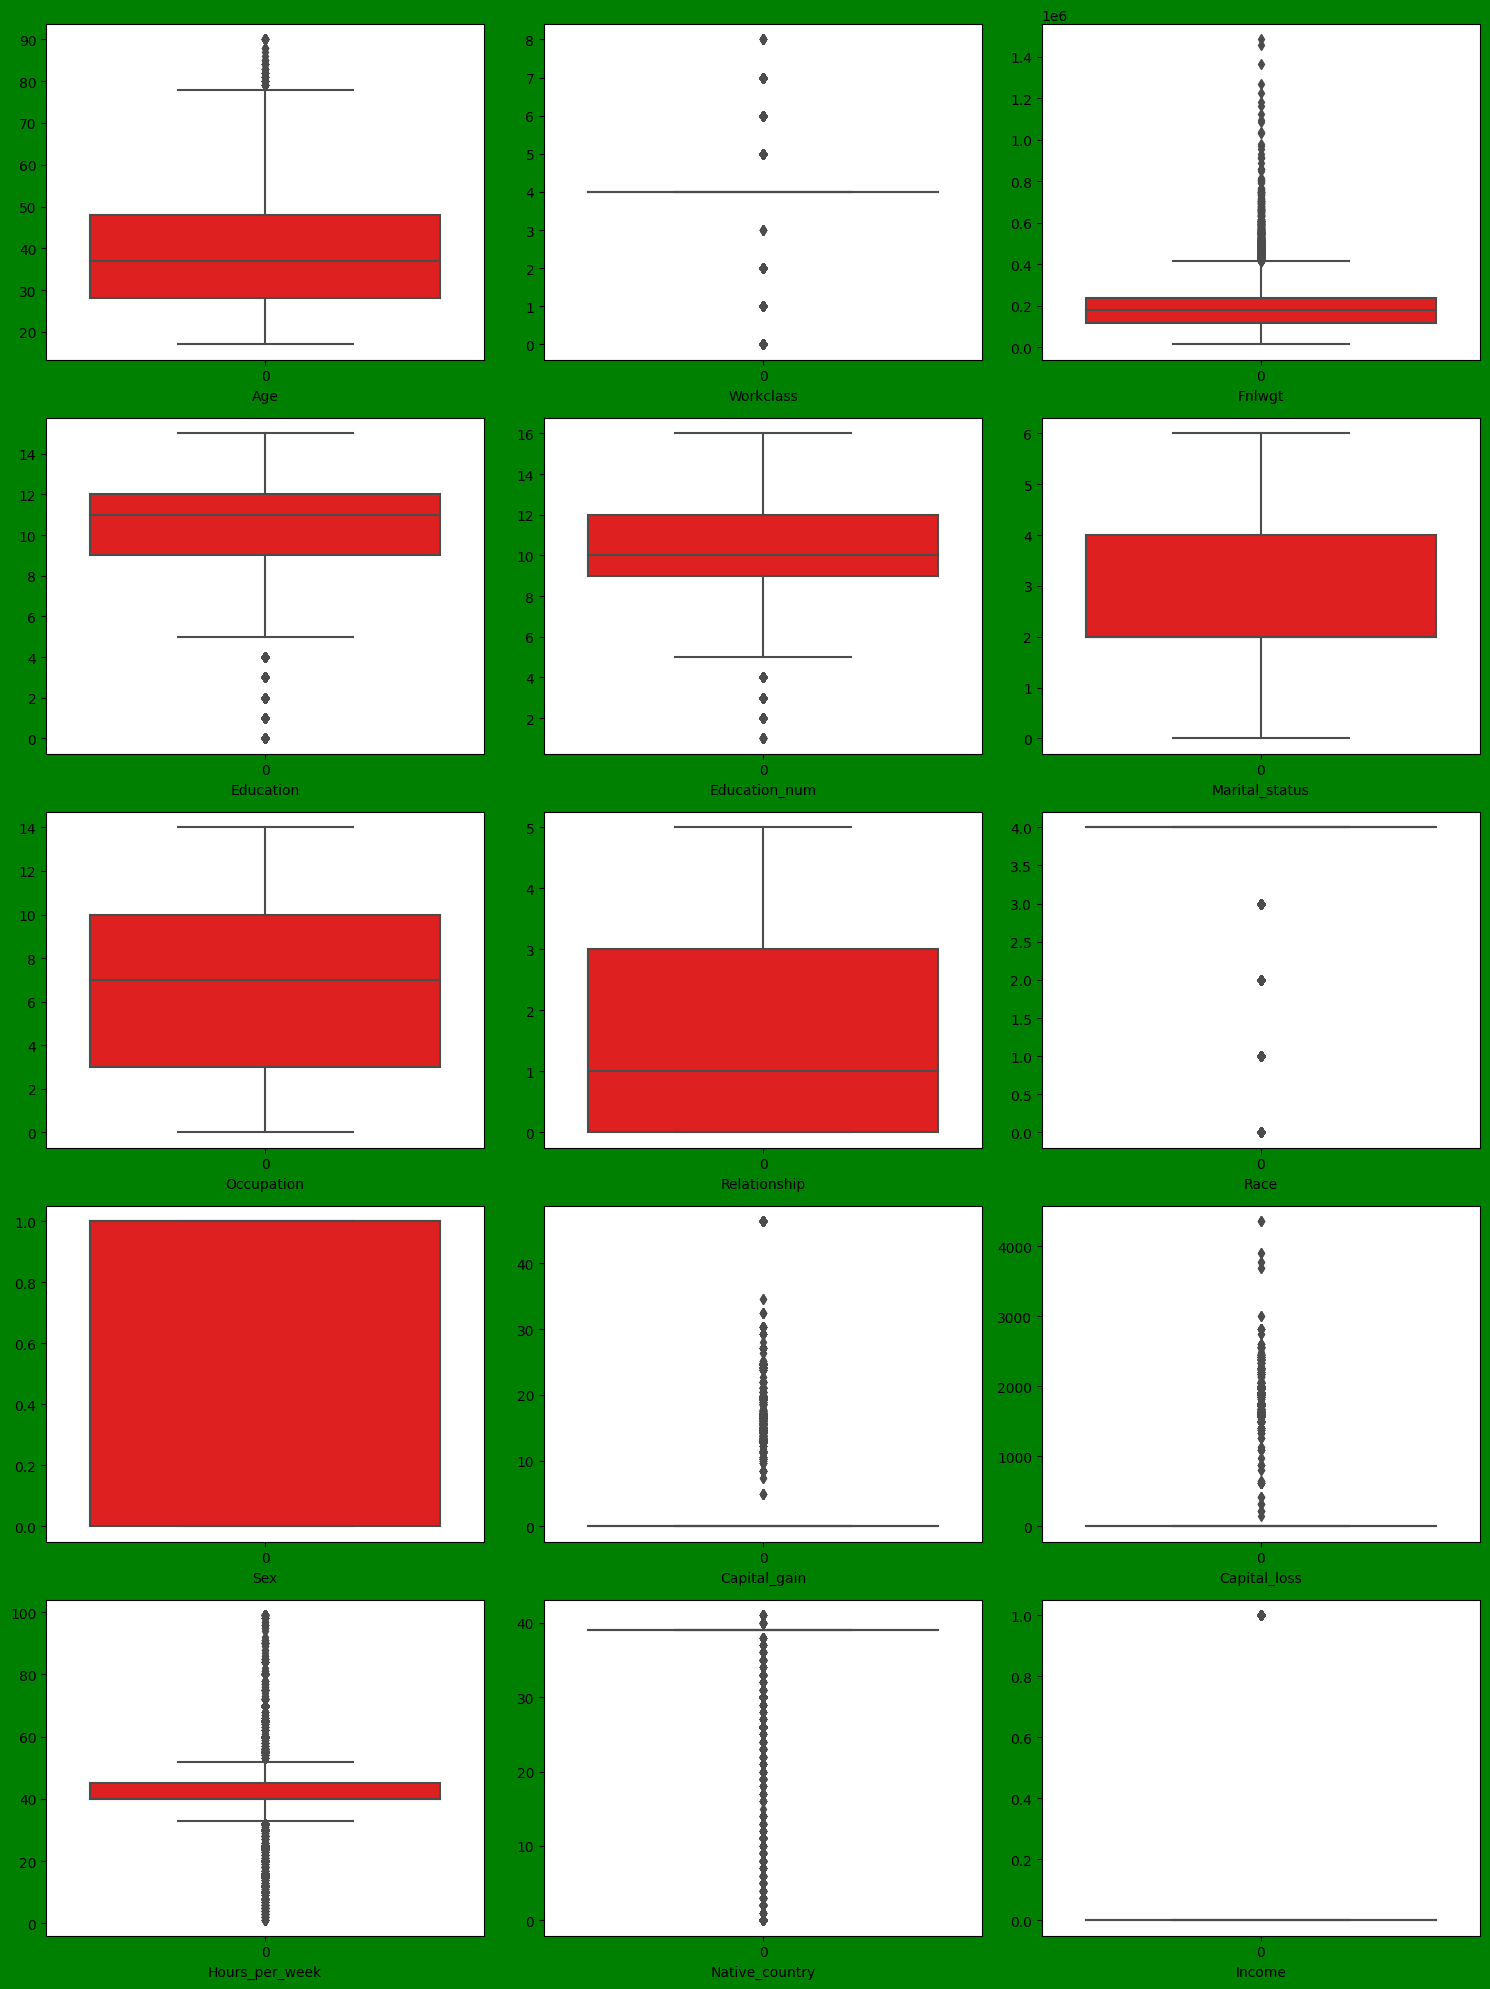

In [13]:
plt.figure(figsize=(15,20),facecolor='green')
plotnumber=1
for column in df:
    plt.subplot(5,3,plotnumber)
    sns.boxplot(df[column],color='red')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

In [14]:
columns=df.columns
out_lier=df[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
df_z=df[(z<4.6).all(axis=1)]
print('## dataloss:')
print((df.shape[0]-df_z.shape[0])/(df.shape[0])*100)

## dataloss:
4.49017199017199


In [15]:
## Feature and label selection
x=df_z.drop(columns='Income')
y=df_z['Income']

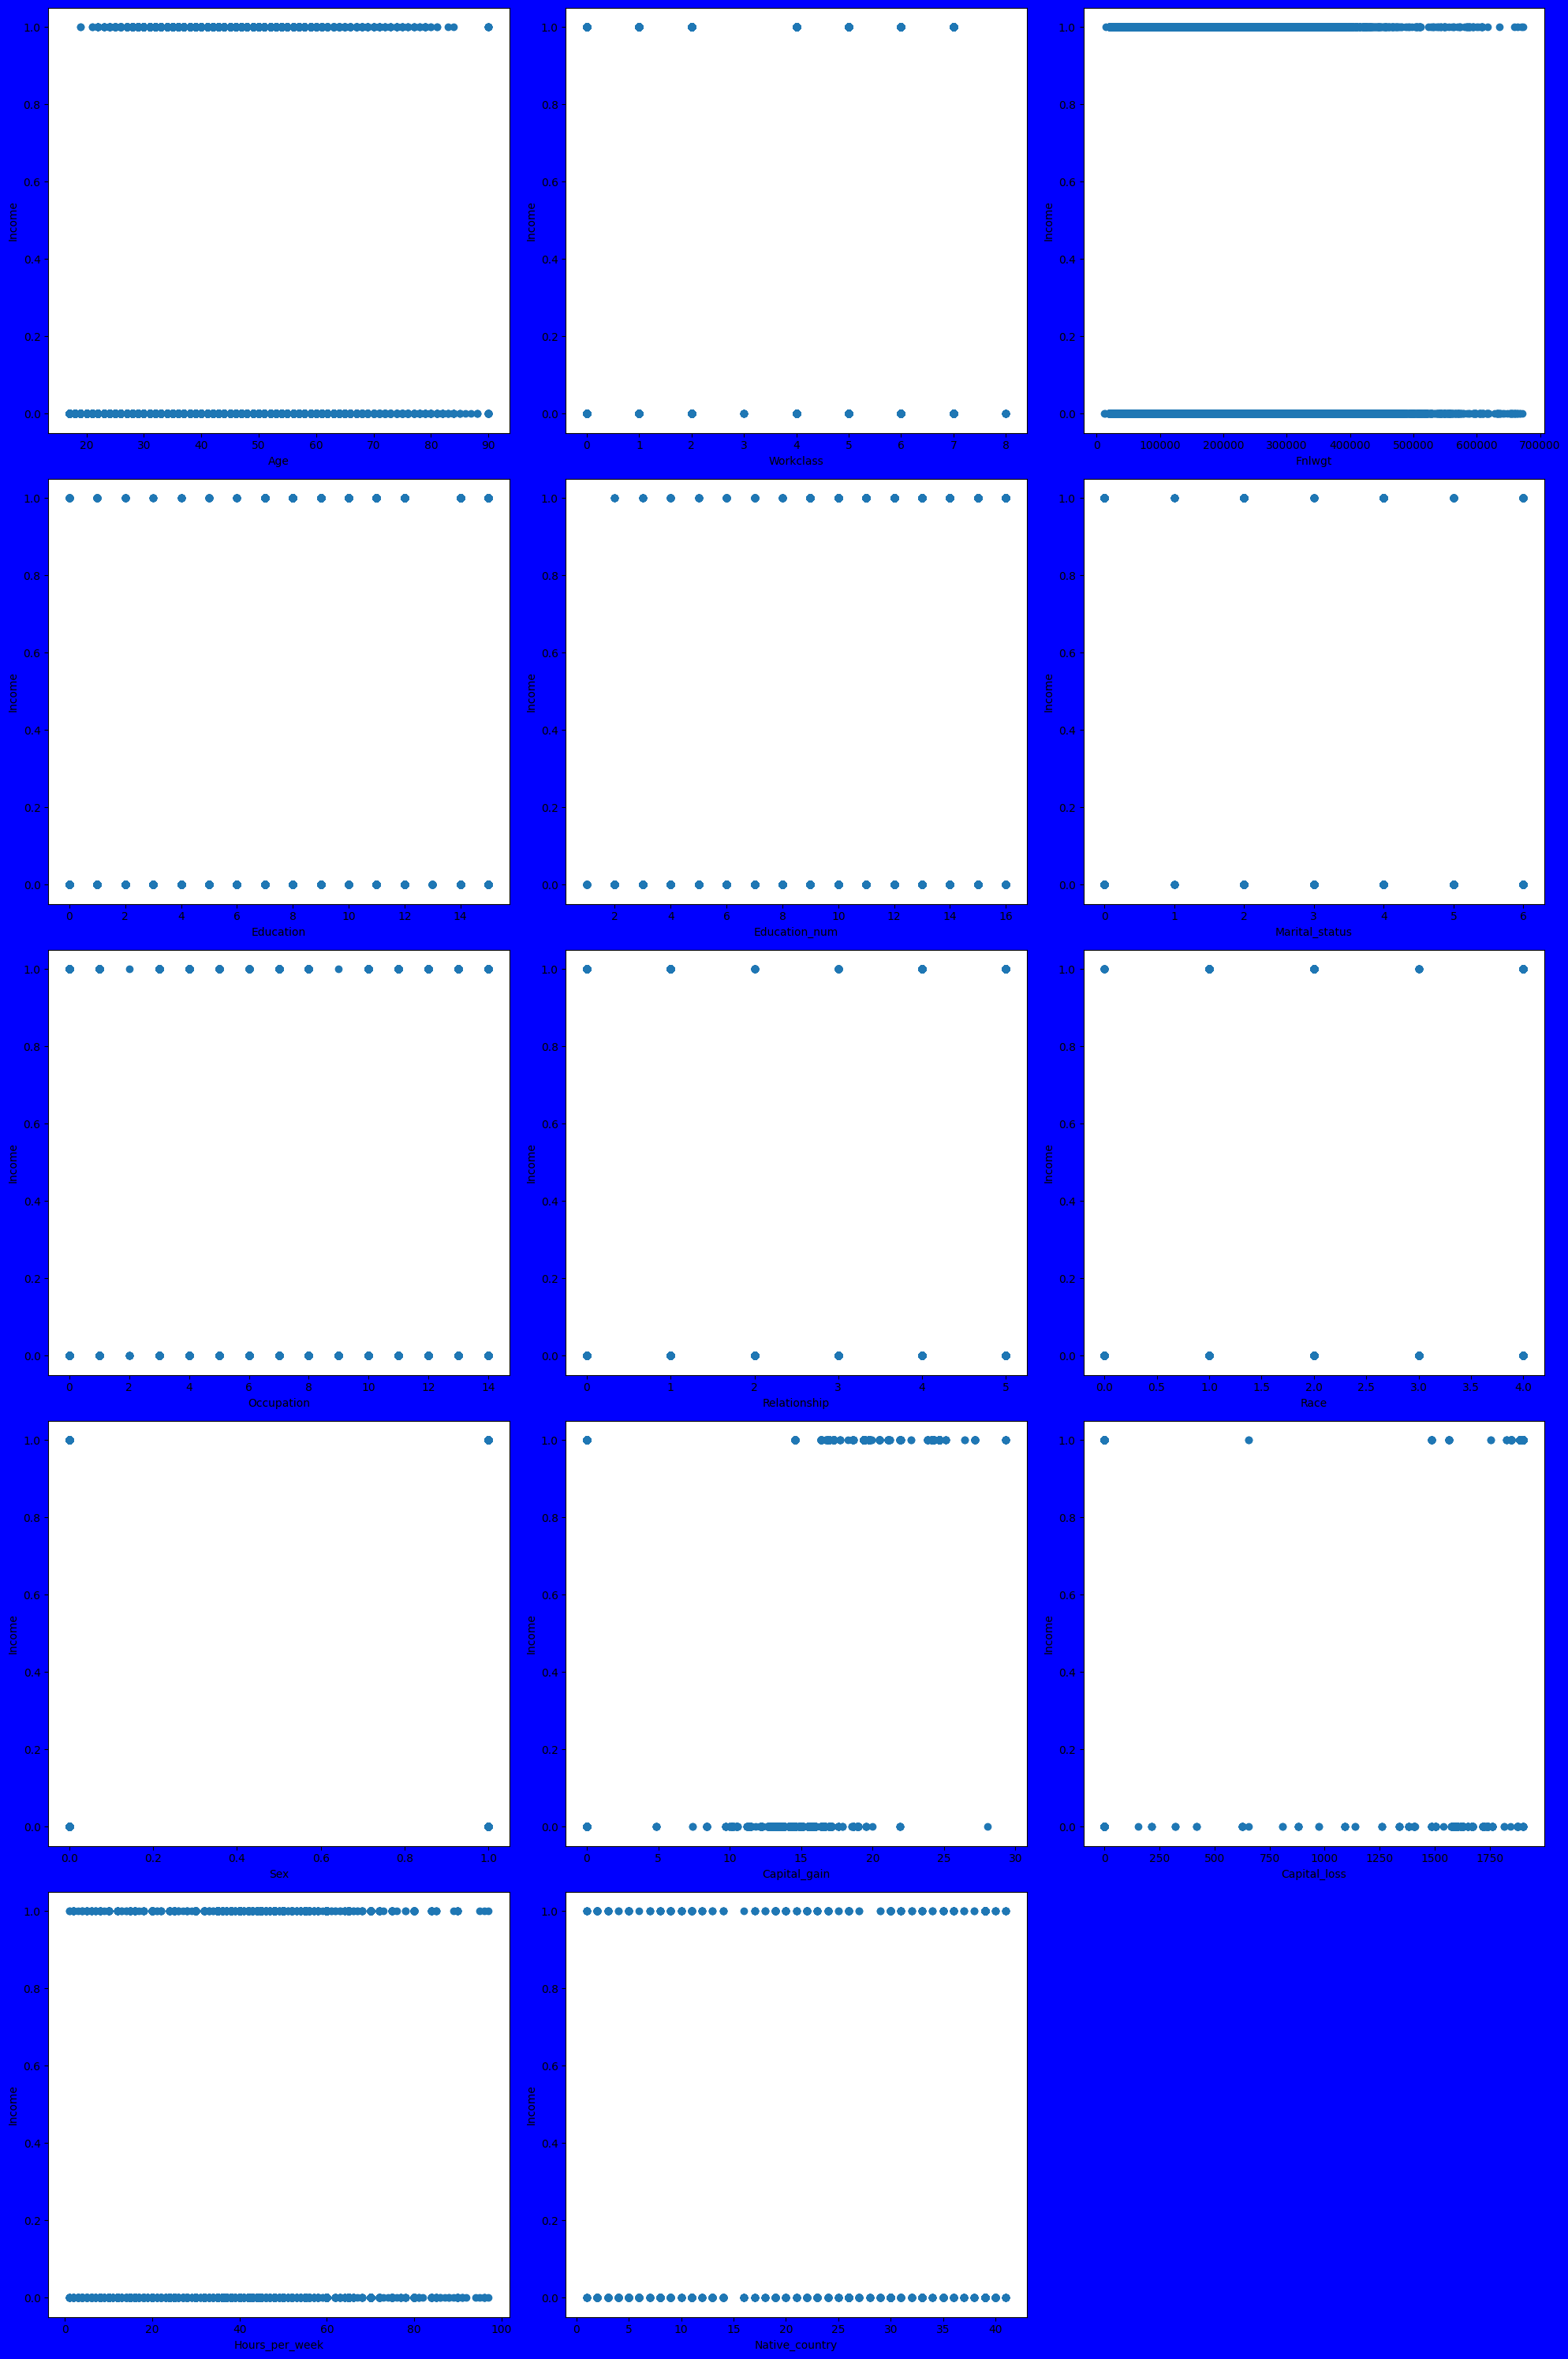

In [16]:
plt.figure(figsize=(20,30), facecolor= 'blue')
plotnumber=1
for column in x:
    if plotnumber <=15:
        plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Income')
        plotnumber+=1
plt.tight_layout() 

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,8.676568,Age
1,8.457279,Workclass
2,4.290968,Fnlwgt
3,9.171911,Education
4,19.035923,Education_num
5,4.037245,Marital_status
6,3.685850,Occupation
7,2.672889,Relationship
8,18.260329,Race
9,4.404191,Sex


In [18]:
x=x.drop(columns='Native_country')

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
print('sample distribution before SMOTE:',y.value_counts())

sample distribution before SMOTE: 0.0    23925
1.0     7173
Name: Income, dtype: int64


In [23]:
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)
print('**************************************************')
print('sample distribution after SMOTE:',y1.value_counts())

**************************************************
sample distribution after SMOTE: 0.0    23925
1.0    23925
Name: Income, dtype: int64


In [24]:
max_accuracy=0
max_rs=0
for i in range (300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    pred=LG.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i
print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.7343782654127482 on random state: 180


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=max_rs)

In [25]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
P_DTC=DTC.predict(x_test)
P_DTC_T=DTC.predict(x_train)
score_DTC=cross_val_score(DTC,x_test,y_test)
acc_dtc=accuracy_score(y_test,P_DTC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_DTC))
print('cross_val_score=',score_DTC)
print('--------------------------------------------------------------------------------------')
cv_mean_dtc=score_DTC.mean()
print('--------------------------------------------------------------------------------------')
diff_dtc_score=accuracy_score(y_test,P_DTC)-score_DTC.mean()
print('difference between accuracy and cv_score is::',diff_dtc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      7216
         1.0       0.86      0.86      0.86      7139

    accuracy                           0.86     14355
   macro avg       0.86      0.86      0.86     14355
weighted avg       0.86      0.86      0.86     14355

cross_val_score= [0.83629397 0.85928248 0.84395681 0.86415883 0.84813654]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.011633577150818475


In [26]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
P_LG=LG.predict(x_test)
P_LG_T=LG.predict(x_train)
score_LG=cross_val_score(LG,x_test,y_test)
acc_LG=accuracy_score(y_test,P_LG)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_LG))
print('cross_val_score=',score_LG)
print('--------------------------------------------------------------------------------------')
cv_mean_LG=score_LG.mean()
print('--------------------------------------------------------------------------------------')
diff_LG_score=accuracy_score(y_test,P_LG)-score_LG.mean()
print('difference between accuracy and cv_score is::',diff_LG_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.64      0.39      0.48      7216
         1.0       0.56      0.78      0.65      7139

    accuracy                           0.58     14355
   macro avg       0.60      0.59      0.57     14355
weighted avg       0.60      0.58      0.57     14355

cross_val_score= [0.57575758 0.59003831 0.65830721 0.66945315 0.67363288]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: -0.04932079414838042


In [27]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
P_ETC=ETC.predict(x_test)
P_ETC_T=ETC.predict(x_train)
score_ETC=cross_val_score(ETC,x_test,y_test)
acc_ETC=accuracy_score(y_test,P_ETC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
cv_mean_etc=score_ETC.mean()
print('--------------------------------------------------------------------------------------')
diff_etc_score=accuracy_score(y_test,P_ETC)-score_ETC.mean()
print('difference between accuracy and cv_score is::',diff_etc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      7216
         1.0       0.90      0.89      0.89      7139

    accuracy                           0.90     14355
   macro avg       0.90      0.90      0.90     14355
weighted avg       0.90      0.90      0.90     14355

cross_val_score= [0.88296761 0.90073145 0.88575409 0.88436085 0.8697318 ]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.01072796934865905


In [28]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
P_GB=GB.predict(x_test)
P_GB_T=GB.predict(x_train)
score_GB=cross_val_score(GB,x_test,y_test)
acc_GB=accuracy_score(y_test,P_GB)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_GB))
print('cross_val_score=',score_GB)
print('--------------------------------------------------------------------------------------')
cv_mean_GB=score_GB.mean()
print('--------------------------------------------------------------------------------------')
diff_GB_score=accuracy_score(y_test,P_GB)-score_GB.mean()
print('difference between accuracy and cv_score is::',diff_GB_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      7216
         1.0       0.90      0.89      0.90      7139

    accuracy                           0.90     14355
   macro avg       0.90      0.90      0.90     14355
weighted avg       0.90      0.90      0.90     14355

cross_val_score= [0.89446186 0.90282132 0.89341693 0.89132706 0.88436085]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.004458376872169989


In [29]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
P_RF=RF.predict(x_test)
P_RF_T=RF.predict(x_train)
score_RF=cross_val_score(RF,x_test,y_test)
acc_RF=accuracy_score(y_test,P_RF)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_RF))
print('cross_val_score=',score_RF)
print('--------------------------------------------------------------------------------------')
cv_mean_RF=score_RF.mean()
print('--------------------------------------------------------------------------------------')
diff_RF_score=accuracy_score(y_test,P_RF)-score_RF.mean()
print('difference between accuracy and cv_score is::',diff_RF_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      7216
         1.0       0.90      0.89      0.89      7139

    accuracy                           0.90     14355
   macro avg       0.90      0.90      0.90     14355
weighted avg       0.90      0.90      0.90     14355

cross_val_score= [0.8861024  0.9021247  0.88784396 0.89306862 0.87704633]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.0066875653082548725


In [30]:
SV=SVC()
SV.fit(x_train,y_train)
P_SV=SV.predict(x_test)
P_SV_T=SV.predict(x_train)
score_SV=cross_val_score(SV,x_test,y_test)
acc_SV=accuracy_score(y_test,P_SV)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_SV))
print('cross_val_score=',score_SV)
print('--------------------------------------------------------------------------------------')
cv_mean_SV=score_SV.mean()
print('--------------------------------------------------------------------------------------')
diff_SV_score=accuracy_score(y_test,P_SV)-score_SV.mean()
print('difference between accuracy and cv_score is::',diff_SV_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.52      0.45      0.48      7216
         1.0       0.51      0.58      0.54      7139

    accuracy                           0.51     14355
   macro avg       0.52      0.52      0.51     14355
weighted avg       0.52      0.51      0.51     14355

cross_val_score= [0.51201672 0.5148032  0.51445489 0.50957854 0.51027517]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.002716823406478608


In [31]:
KN=KNeighborsClassifier()
KN.fit(x_train,y_train)
P_KN=KN.predict(x_test)
P_KN_T=KN.predict(x_train)
score_KN=cross_val_score(KN,x_test,y_test)
acc_KN=accuracy_score(y_test,P_KN)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_KN))
print('cross_val_score=',score_KN)
print('--------------------------------------------------------------------------------------')
cv_mean_KN=score_KN.mean()
print('--------------------------------------------------------------------------------------')
diff_KN_score=accuracy_score(y_test,P_KN)-score_KN.mean()
print('difference between accuracy and cv_score is::',diff_KN_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.72      0.62      0.66      7216
         1.0       0.66      0.76      0.70      7139

    accuracy                           0.69     14355
   macro avg       0.69      0.69      0.68     14355
weighted avg       0.69      0.69      0.68     14355

cross_val_score= [0.61128527 0.61825148 0.61093696 0.6189481  0.59839777]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.07405085336119821


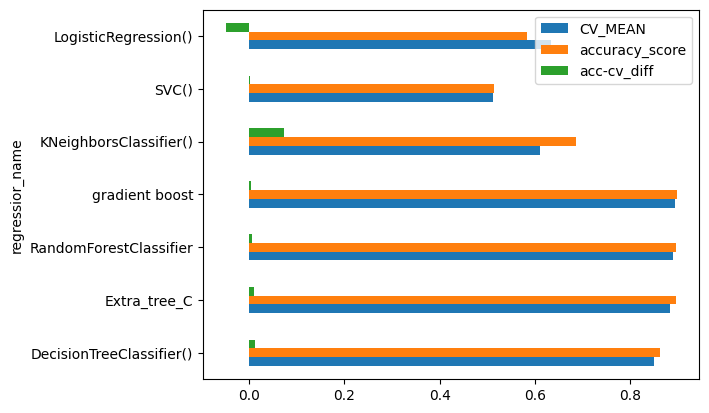

In [32]:
ml_compare=pd.DataFrame()
DT_C={'regressior_name':DTC,'CV_MEAN':cv_mean_dtc,'accuracy_score':acc_dtc,'acc-cv_diff':diff_dtc_score}
ET_C={'regressior_name':'Extra_tree_C','CV_MEAN':cv_mean_etc,'accuracy_score':acc_ETC,'acc-cv_diff':diff_etc_score}
RF_C={'regressior_name':'RandomForestClassifier','CV_MEAN':cv_mean_RF,'accuracy_score':acc_RF,'acc-cv_diff':diff_RF_score}
GB_C={'regressior_name':'gradient boost','CV_MEAN':cv_mean_GB,'accuracy_score':acc_GB,'acc-cv_diff':diff_GB_score}
KNN_C={'regressior_name':KN,'CV_MEAN':cv_mean_KN,'accuracy_score':acc_KN,'acc-cv_diff':diff_KN_score}
SV_C={'regressior_name':SV,'CV_MEAN':cv_mean_SV,'accuracy_score':acc_SV,'acc-cv_diff':diff_SV_score}
LG={'regressior_name':LG,'CV_MEAN':cv_mean_LG,'accuracy_score':acc_LG,'acc-cv_diff':diff_LG_score}
ml_compare=ml_compare.append([DT_C,ET_C,RF_C,GB_C,KNN_C,SV_C,LG],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])
ml_compare.plot.barh()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV
p1={'loss':['deviance','exponential','log_loss'],'learning_rate':[0.1,0.2],'n_estimators':[100],'criterion':['friedman_mse','squared_error'],'min_samples_split':[2],'random_state':[100,200]}
GCV=GridSearchCV(GradientBoostingClassifier(),param_grid=p1,cv=5)
final=GCV.fit(x_train,y_train)
print(final.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 100}


In [34]:
final_model=GradientBoostingClassifier(
criterion= 'friedman_mse',n_estimators=100, 
random_state=200,learning_rate=0.2,loss='deviance')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.80459770114942


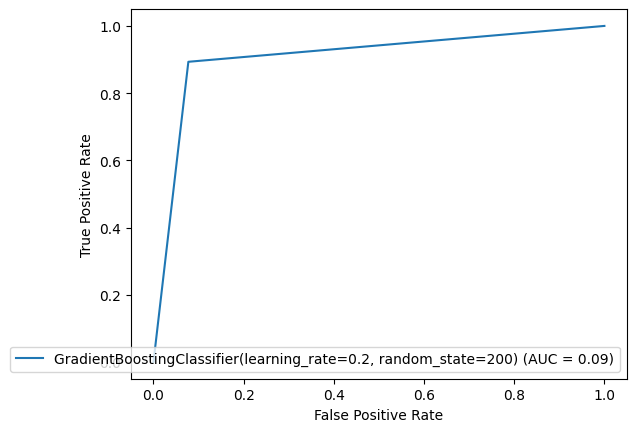

In [35]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(tpr,fpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [36]:
import pickle
file_name='CENSUS_ANALYSIS.pkl'
pickle.dump(final_model,open(file_name,'wb'))